# Module 6 & 7 - Associations

## Notes
- Install these packages:

    + `pip3 install mlxtend`
    + `pip3 install openpyxl`

- Training data set is from here: 
    
    + `https://archive.ics.uci.edu/ml/datasets/online+retail`  
    + `http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx`

- Code example is from here: 
    + `https://pbpython.com/market-basket-analysis.html`

In [212]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_excel('../data/Online_Retail.xlsx')
# df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
init_series = df.copy()
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Notes
Remove items that lack invoice number (Null/NaN) or have letter `C` as `credit transactions`.


In [213]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print('initial length:', len(init_series))
print('    new length:', len(df))
print(' items removed:', len(init_series)-len(df))

initial length: 541909
    new length: 532621
 items removed: 9288


In [214]:
basket = (df[df['Country'] == "France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [217]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [218]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [219]:
len(rules)

26

In [222]:
new_rules = rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]
new_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


In [223]:
len(new_rules)

8

In [225]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

In [226]:
basket['ALARM CLOCK BAKELIKE RED'].sum()


316.0

In [227]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
10,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


# Example #2

`https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c`



In [228]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [229]:

df = pd.read_csv('../data/retail_dataset.csv')
dataset = df.to_numpy()
df = df.replace(np.nan, '', regex=True)
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,,
3,Cheese,Meat,Eggs,Milk,Wine,,
4,Meat,Pencil,Wine,,,,
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,,,,
311,Meat,Milk,Pencil,,,,
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,,,,,


In [230]:
from mlxtend.preprocessing import TransactionEncoder
dataset = df.to_numpy()


new_dataset = []
for row in dataset:
    new_row = []
    for i in row:
        if i != '':
            new_row.append(i)
    new_dataset.append(new_row)

te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df1 = pd.DataFrame(te_ary, columns=te.columns_)    
df1    

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
310,False,True,True,False,True,False,False,False,False
311,False,False,False,False,False,True,True,True,False
312,False,True,True,True,True,True,False,True,True
313,False,False,True,False,False,True,False,False,False


In [231]:
from mlxtend.frequent_patterns import apriori


In [207]:
freq_items = apriori(df1, min_support=0.25, use_colnames=True, verbose=1)
freq_items

Processing 42 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bread, Bagel)"


In [232]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()
print(len(rules))

8


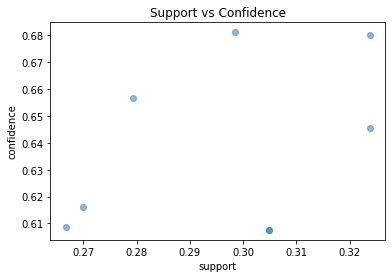

In [233]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

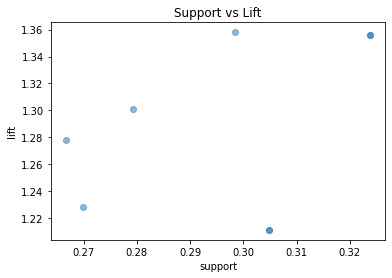

In [234]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

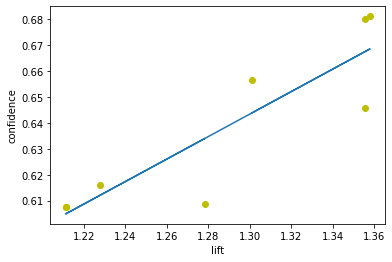

In [235]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
plt.xlabel('lift')
plt.ylabel('confidence')
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

# Scratch Paper


In [1]:
T = [['a','b'], ['c','d'], ['a','c'], ['a','b','d'], ['a','e'], ['d'], ['a'], ['b']]
T = [['Bread', 'Milk'], 
     ['Bread', 'Diapers', 'Beer', 'Eggs'], 
     ['Milk', 'Diapers', 'Beer', 'Cola'],
     ['Bread', 'Milk', 'Diapers', 'Beer'],
     ['Bread', 'Milk', 'Diapers', 'Cola']]
sorted_T = []
for t in T:
    t.sort()
    sorted_T.append(t)
T = sorted_T    
list(T)
print(f'There are {len(T)} transactions:')
display(T)

There are 5 transactions:


[['Bread', 'Milk'],
 ['Beer', 'Bread', 'Diapers', 'Eggs'],
 ['Beer', 'Cola', 'Diapers', 'Milk'],
 ['Beer', 'Bread', 'Diapers', 'Milk'],
 ['Bread', 'Cola', 'Diapers', 'Milk']]

In [91]:
# Making Universe set U from transaction set T
def make_U(T):    
    u = {}
    for t in T:
        for i in t:
            u[i] = i
    
    U = list(u)
    U.sort()
    return U
U = make_U(T)

print(f'There are {len(U)} items:')
display(U)

There are 6 items:


['Beer', 'Bread', 'Cola', 'Diapers', 'Eggs', 'Milk']

## Brute-force
Printing out a lattice of n items of universe U

In [46]:
from itertools import permutations, combinations

"""
Generate all possible k-itemsets for a universe U
Organize the list by row, with row 0 contains null,
row 1 contains all 1-itemsets, row 2 contains all 2-itemsets, etc.
"""
def bf_all_itemsets(U):
    bf_candidates = [[]]
    print(U)
    for c_len in range(1,len(U)+1):
        cs = combinations(u,c_len)
        row = []
        for c in cs:
            c = list(c)
            c.sort()
            row.append(c)

        bf_candidates.append(row)
    return bf_candidates

"""
return whether or not a k_itemset is in a transaction t.
"""
def is_k_itemset_in_transaction(k_itemset, t):
    return all(item in t for item in k_itemset)
    
"""
For a given set of k-itemsets, with at support count against a transaction T,
return a set of frequent k-itemsets.
"""

def get_candidates(sup_count, k_itemsets, T):
    k_itemset_coll = {}
    
    """
    First, we count the occurence of a k-itemset in the set of 
    transaction T.
    """
    for k_itemset in k_itemsets:
        k_itemset_str = '_'.join(k_itemset)
        for t in T:
            if is_k_itemset_in_transaction(k_itemset, t):
                if k_itemset_str in k_itemset_coll:
                    item = k_itemset_coll[k_itemset_str]
                    item[1] += 1
                    k_itemset_coll[k_itemset_str] = item
                else:
                    item = [k_itemset, 1]
                    k_itemset_coll[k_itemset_str] = item           

    """
    Then, we are looking for k-itemsets that is infrequent.
    We keep the keys of the removal k-itemsets in a list
    We then go through the removal list and remove the 
    k-itemsets by key
    """                
    remove_keys = []
    for i in k_itemset_coll:
        item = k_itemset_coll[i]
        if item[1] < sup_count:
            remove_keys.append(i)
    for key in remove_keys:
        del k_itemset_coll[key]
        
    return k_itemset_coll


        
#     remove_keys = []
#     for key in k_candidates:
#         for kminus1_candidate in kminus1_candidates:
#             k_candidate = k_candidates[key]
            
#             if not all(item in k_candidate for item in kminus1_candidate):
#                 if key not in remove_keys:
#                     remove_keys.append(key)
              
#     for key in remove_keys:
#         del k_candidates[key]

In [55]:
all_itemsets = bf_all_itemsets(U)
# display(all_itemsets)

sup_count = 2
minsup = sup_count/len(T)
print(f'supp_count:{sup_count}, minsup:{minsup}')
      
candidates = [[]] # Null first entry as in lattice      

for i in range(1,len(all_itemsets)):
    candidates.append(get_candidates(sup_count, all_itemsets[i], T))
    
for i in range(1,len(candidates)):
    print(f'{i}({len(candidates[i])}): {candidates[i]}\n')
    
candidates
    
print('\n*** pruned candidates ***\n')    
for candidate in candidates:
    for key in candidate:
        print(candidate[key])       
candidates
# k = 3
# k_itemset_candidates = candidates[k]
# print(f'\n*** {k}-itemset candidates ***\n')
# k_itemset_candidates

['Beer', 'Bread', 'Cola', 'Diapers', 'Eggs', 'Milk']
supp_count:2, minsup:0.4
1(5): {'Bread': [['Bread'], 4], 'Milk': [['Milk'], 4], 'Beer': [['Beer'], 3], 'Diapers': [['Diapers'], 4], 'Cola': [['Cola'], 2]}

2(8): {'Bread_Milk': [['Bread', 'Milk'], 3], 'Beer_Bread': [['Beer', 'Bread'], 2], 'Bread_Diapers': [['Bread', 'Diapers'], 3], 'Beer_Milk': [['Beer', 'Milk'], 2], 'Diapers_Milk': [['Diapers', 'Milk'], 3], 'Cola_Milk': [['Cola', 'Milk'], 2], 'Beer_Diapers': [['Beer', 'Diapers'], 3], 'Cola_Diapers': [['Cola', 'Diapers'], 2]}

3(4): {'Bread_Diapers_Milk': [['Bread', 'Diapers', 'Milk'], 2], 'Beer_Bread_Diapers': [['Beer', 'Bread', 'Diapers'], 2], 'Beer_Diapers_Milk': [['Beer', 'Diapers', 'Milk'], 2], 'Cola_Diapers_Milk': [['Cola', 'Diapers', 'Milk'], 2]}

4(0): {}

5(0): {}

6(0): {}


*** pruned candidates ***

[['Bread'], 4]
[['Milk'], 4]
[['Beer'], 3]
[['Diapers'], 4]
[['Cola'], 2]
[['Bread', 'Milk'], 3]
[['Beer', 'Bread'], 2]
[['Bread', 'Diapers'], 3]
[['Beer', 'Milk'], 2]
[['Diap

[[],
 {'Bread': [['Bread'], 4],
  'Milk': [['Milk'], 4],
  'Beer': [['Beer'], 3],
  'Diapers': [['Diapers'], 4],
  'Cola': [['Cola'], 2]},
 {'Bread_Milk': [['Bread', 'Milk'], 3],
  'Beer_Bread': [['Beer', 'Bread'], 2],
  'Bread_Diapers': [['Bread', 'Diapers'], 3],
  'Beer_Milk': [['Beer', 'Milk'], 2],
  'Diapers_Milk': [['Diapers', 'Milk'], 3],
  'Cola_Milk': [['Cola', 'Milk'], 2],
  'Beer_Diapers': [['Beer', 'Diapers'], 3],
  'Cola_Diapers': [['Cola', 'Diapers'], 2]},
 {'Bread_Diapers_Milk': [['Bread', 'Diapers', 'Milk'], 2],
  'Beer_Bread_Diapers': [['Beer', 'Bread', 'Diapers'], 2],
  'Beer_Diapers_Milk': [['Beer', 'Diapers', 'Milk'], 2],
  'Cola_Diapers_Milk': [['Cola', 'Diapers', 'Milk'], 2]},
 {},
 {},
 {}]

## Apriori algorithm
$F_{k} = {i\ |\ i \in I \land \sigma({i}) \ge N \ x \ minsup}$

In [100]:
"""
Generating a set of all possible k-itemsets transactions T 
from a set of universal items U
"""
def make_T(a_U, k):
    cs = combinations(a_U, k)
    k_itemsets = []
    for c in cs:
        c = list(c)
        c.sort()
        k_itemsets.append(c)
    return k_itemsets

def get_k_itemsets(ck):
    k_itemsets = []
    for item in ck:
        k_itemsets.append(ck[item][0])
    return k_itemsets

"""
Pruning. starting with 2. If k-1 subset of k_candidate 
is not a part of k_minus_1_candidate, drop the k-itemset.
"""

def candidate_prune(kminus1_candidates, k_candidates):
    print('(k-1)-itemsets:')
    display(kminus1_candidates)
    print('k-itemsets:')
    display(k_candidates)
    
    return_k_candidates = []
    
    for i in range(len(k_candidates)):        
        k = len(k_candidates[i])        
        if k == 1:
            print('*** Nothing to prune ***')
            return k_candidates
            
        k_candidate = [k_candidates[i]]
        a_U = make_U(k_candidate)
        kminus1_subsets = make_T(a_U, k-1)
        if all(item in kminus1_candidates for item in kminus1_subsets):
            return_k_candidates.append(k_candidates[i])
            
    return return_k_candidates

"""
Generating all possible k-itemset transactions T
from a previous set of (k-1)-itemsets 
"""
def candidate_gen(kminus1_itemsets, k):  
    return make_T(make_U(kminus1_itemsets), k)

"""
"""    
def apriori_gen(F, T, sup_count):    
    UFk = [[]]
    a_U = U
    # display(a_U)
    a_T = make_T(a_U, 1)
    # display(a_T)

    prev_ck = a_T
    for k in range (1, 6):
        print(f'*** generating {k}-itemsets ***')
        #k_itemsets = make_T(a_U, k)
        k_itemsets = candidate_gen(prev_ck, k)
        
        print(f'*** pruning {k}-itemsets ***')
        # print('** before pruning **')
        # display(k_itemsets)
        k_itemsets = candidate_prune(prev_ck, k_itemsets)        
        # print('** after pruning **')
        # display(k_itemsets)

        print('*** verifying frequent itemsets ***')
        ck = get_candidates(sup_count, k_itemsets, T)
        display(ck)
        # k_itemsets = get_k_itemsets(ck)
        prev_ck = get_k_itemsets(ck)

        if ck == None or len(ck) == 0:
            print ('** DONE **')
            break

        UFk.append(ck)
        k_itemsets = get_k_itemsets(ck)
        # a_U = make_U(k_itemsets)     
    return UFk


In [102]:
sup_count = 2
UFk = apriori_gen(U, T, sup_count)

print('*** UFk ***')
display(UFk)

*** generating 1-itemsets ***
*** pruning 1-itemsets ***
(k-1)-itemsets:


[['Beer'], ['Bread'], ['Cola'], ['Diapers'], ['Eggs'], ['Milk']]

k-itemsets:


[['Beer'], ['Bread'], ['Cola'], ['Diapers'], ['Eggs'], ['Milk']]

*** Nothing to prune ***
*** verifying frequent itemsets ***


{'Beer': [['Beer'], 3],
 'Bread': [['Bread'], 4],
 'Cola': [['Cola'], 2],
 'Diapers': [['Diapers'], 4],
 'Milk': [['Milk'], 4]}

*** generating 2-itemsets ***
*** pruning 2-itemsets ***
(k-1)-itemsets:


[['Beer'], ['Bread'], ['Cola'], ['Diapers'], ['Milk']]

k-itemsets:


[['Beer', 'Bread'],
 ['Beer', 'Cola'],
 ['Beer', 'Diapers'],
 ['Beer', 'Milk'],
 ['Bread', 'Cola'],
 ['Bread', 'Diapers'],
 ['Bread', 'Milk'],
 ['Cola', 'Diapers'],
 ['Cola', 'Milk'],
 ['Diapers', 'Milk']]

*** verifying frequent itemsets ***


{'Beer_Bread': [['Beer', 'Bread'], 2],
 'Beer_Diapers': [['Beer', 'Diapers'], 3],
 'Beer_Milk': [['Beer', 'Milk'], 2],
 'Bread_Diapers': [['Bread', 'Diapers'], 3],
 'Bread_Milk': [['Bread', 'Milk'], 3],
 'Cola_Diapers': [['Cola', 'Diapers'], 2],
 'Cola_Milk': [['Cola', 'Milk'], 2],
 'Diapers_Milk': [['Diapers', 'Milk'], 3]}

*** generating 3-itemsets ***
*** pruning 3-itemsets ***
(k-1)-itemsets:


[['Beer', 'Bread'],
 ['Beer', 'Diapers'],
 ['Beer', 'Milk'],
 ['Bread', 'Diapers'],
 ['Bread', 'Milk'],
 ['Cola', 'Diapers'],
 ['Cola', 'Milk'],
 ['Diapers', 'Milk']]

k-itemsets:


[['Beer', 'Bread', 'Cola'],
 ['Beer', 'Bread', 'Diapers'],
 ['Beer', 'Bread', 'Milk'],
 ['Beer', 'Cola', 'Diapers'],
 ['Beer', 'Cola', 'Milk'],
 ['Beer', 'Diapers', 'Milk'],
 ['Bread', 'Cola', 'Diapers'],
 ['Bread', 'Cola', 'Milk'],
 ['Bread', 'Diapers', 'Milk'],
 ['Cola', 'Diapers', 'Milk']]

*** verifying frequent itemsets ***


{'Beer_Bread_Diapers': [['Beer', 'Bread', 'Diapers'], 2],
 'Beer_Diapers_Milk': [['Beer', 'Diapers', 'Milk'], 2],
 'Bread_Diapers_Milk': [['Bread', 'Diapers', 'Milk'], 2],
 'Cola_Diapers_Milk': [['Cola', 'Diapers', 'Milk'], 2]}

*** generating 4-itemsets ***
*** pruning 4-itemsets ***
(k-1)-itemsets:


[['Beer', 'Bread', 'Diapers'],
 ['Beer', 'Diapers', 'Milk'],
 ['Bread', 'Diapers', 'Milk'],
 ['Cola', 'Diapers', 'Milk']]

k-itemsets:


[['Beer', 'Bread', 'Cola', 'Diapers'],
 ['Beer', 'Bread', 'Cola', 'Milk'],
 ['Beer', 'Bread', 'Diapers', 'Milk'],
 ['Beer', 'Cola', 'Diapers', 'Milk'],
 ['Bread', 'Cola', 'Diapers', 'Milk']]

*** verifying frequent itemsets ***


{}

** DONE **
*** UFk ***


[[],
 {'Beer': [['Beer'], 3],
  'Bread': [['Bread'], 4],
  'Cola': [['Cola'], 2],
  'Diapers': [['Diapers'], 4],
  'Milk': [['Milk'], 4]},
 {'Beer_Bread': [['Beer', 'Bread'], 2],
  'Beer_Diapers': [['Beer', 'Diapers'], 3],
  'Beer_Milk': [['Beer', 'Milk'], 2],
  'Bread_Diapers': [['Bread', 'Diapers'], 3],
  'Bread_Milk': [['Bread', 'Milk'], 3],
  'Cola_Diapers': [['Cola', 'Diapers'], 2],
  'Cola_Milk': [['Cola', 'Milk'], 2],
  'Diapers_Milk': [['Diapers', 'Milk'], 3]},
 {'Beer_Bread_Diapers': [['Beer', 'Bread', 'Diapers'], 2],
  'Beer_Diapers_Milk': [['Beer', 'Diapers', 'Milk'], 2],
  'Bread_Diapers_Milk': [['Bread', 'Diapers', 'Milk'], 2],
  'Cola_Diapers_Milk': [['Cola', 'Diapers', 'Milk'], 2]}]

In [119]:
# Computing Confidence
# for each frequent k-itemset fk, k >= 2 do
#   H1 = 1
# end for

for k in range(2, len(UFk)):
    for key in UFk[k]:
        k_itemset = UFk[k][key][0]
        k_count = UFk[k][key][1]
        print(k_itemset, k_count)
        h1 = []
        for item in k_itemset:
            h1.append([item])
        print(h1)

# for i in range(1,len(UFk)-1):
#     smaller = UFk[i]
#     for s_key in smaller:
#         X = smaller[s_key][0]
#         X_count = smaller[s_key][1]
#         for j in range (i+1, len(UFk)):
#             larger = UFk[j]
#             for l_key in larger:
#                 Y = larger[l_key][0]
#                 Y_count = larger[l_key][1]
#                 # print(f'X: {X}; Y:{Y}')
#                 if all(item in Y for item in X):
#                     print(f'{X} -> {Y}: {X_count/Y_count}')
#                     print(f'{Y} -> {X}: {Y_count/X_count}')
#     # for key in UFk[i]:
#         #display(UFk[i][key][0])
        

['Beer', 'Bread'] 2
[['Beer'], ['Bread']]
['Beer', 'Diapers'] 3
[['Beer'], ['Diapers']]
['Beer', 'Milk'] 2
[['Beer'], ['Milk']]
['Bread', 'Diapers'] 3
[['Bread'], ['Diapers']]
['Bread', 'Milk'] 3
[['Bread'], ['Milk']]
['Cola', 'Diapers'] 2
[['Cola'], ['Diapers']]
['Cola', 'Milk'] 2
[['Cola'], ['Milk']]
['Diapers', 'Milk'] 3
[['Diapers'], ['Milk']]
['Beer', 'Bread', 'Diapers'] 2
[['Beer'], ['Bread'], ['Diapers']]
['Beer', 'Diapers', 'Milk'] 2
[['Beer'], ['Diapers'], ['Milk']]
['Bread', 'Diapers', 'Milk'] 2
[['Bread'], ['Diapers'], ['Milk']]
['Cola', 'Diapers', 'Milk'] 2
[['Cola'], ['Diapers'], ['Milk']]
